# Capstone Project - The Battle of Neighborhoods

## Introduction

New York City's demographics show that it is a large and ethnically diverse metropolis. It is the largest city in the United States with a long history of international immigration. New York City was home to nearly 8.5 million people in 2014, accounting for over 40% of the population of New York State and a slightly lower percentage of the New York metropolitan area, home to approximately 23.6 million. Over the last decade the city has been growing faster than the region. The New York region continues to be by far the leading metropolitan gateway for legal immigrants admitted into the United States.
Throughout its history, New York City has been a major point of entry for immigrants; the term "melting pot" was coined to describe densely populated immigrant neighborhoods on the Lower East Side. As many as 800 languages are spoken in New York, making it the most linguistically diverse city in the world. English remains the most widely spoken language, although there are areas in the outer boroughs in which up to 25% of people speak English as an alternate language, and/or have limited or no English language fluency. English is least spoken in neighborhoods such as Flushing, Sunset Park, and Corona.
New York City is the most populous city in the United States, with an estimated 8,491,079 people living in the city, according to U.S. Census estimates dating July 1, 2014 (up from 8,175,133 in 2010; 8.0 million in 2000; and 7.3 million in 1990). This amounts to about 40% of New York State's population and a similar percentage of the metropolitan regional population. New York's two key demographic features are its population density and cultural diversity. The city's population density of 26,403 people per square mile (10,194/km²), makes it the densest of any American municipality with a population above 100,000. Manhattan's population density is 66,940 people per square mile (25,846/km²), highest of any county in the United States.
New York City is multicultural. About 36% of the city's population is foreign-born, one of the highest among US cities. The eleven nations constituting the largest sources of modern immigration to New York City are the Dominican Republic, China, Jamaica, Guyana, Mexico, Ecuador, Brazil, Haiti, Trinidad and Tobago, Colombia, Russia and El Salvador.
The New York City metropolitan area is home to the largest Jewish community outside Israel. It is also home to nearly a quarter of the nation's Indian Americans and 15% of all Korean Americans and the largest Asian Indian population in the Western Hemisphere; the largest African American community of any city in the country; and including 6 Chinatowns in the city proper, comprised as of 2008 a population of 659,596 overseas Chinese, the largest outside of Asia. New York City alone, according to the 2010 Census, has now become home to more than one million Asian Americans, greater than the combined totals of San Francisco and Los Angeles. New York contains the highest total Asian population of any U.S. city proper. 6.0% of New York City is of Chinese ethnicity, with about forty percent of them living in the borough of Queens alone. Koreans make up 1.2% of the city's population, and Japanese at 0.3%. Filipinos are the largest southeast Asian ethnic group at 0.8%, followed by Vietnamese who make up only 0.2% of New York City's population. Indians are the largest South Asian group, comprising 2.4% of the city's population, and Bangladeshis and Pakistanis at 0.7% and 0.5%, respectively.

With its diverse culture comes diverse food. There are many restaurants in New York belonging to different categories like Indian, Chinese, Thai etc
So as part of this project, we will list and visualize all major parts of New York that has some good Indian restaurants. 


## Data

For this project we need the following data :

 New York City data that contains list Boroughs, Neighborhoods along with their latitude and longitude...
    - Data source : https://cocl.us/new_york_dataset
    - Description : This data set contains the required information. And we will use this data set to explore various neighborhoods of new york city.
    
Indian resturants in each neighborhood of new york city.
    - Data source : Fousquare API
    - Description : By using this api we will get all the venues in each neighborhood. We can filter these venues to get only indian resturants.
    
GeoSpace data
    - Data source : https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
    - Description : By using this geo space data we will get the New york Borough boundaries that will help us visualize choropleth map.

### Approach

- Collect the new york city data from https://cocl.us/new_york_dataset    
- Using FourSquare API we will find all venues for each neighborhood.  
- Filter out all venues that are Indian Resturants.  
- Find rating , tips and like count for each Indian Resturants using FourSquare API.   
- Using rating for each resturant , we will sort that data.  
- Visualize the Ranking of neighborhoods using folium library(python)   

### Questions that can be asked using the above mentioned datasets

- What is best location in New York City for Indian Cuisine ?  
- Which areas have potential Indian Resturant Market ?  
- Which all areas lack Indian Resturants ?  
- Which is the best place to stay if I prefer Indian Cuisine ?  

### Analysis

We will import the required libraries for python       

- pandas and numpy for handling data   
- request module for using FourSquare API   
- geopy to get co-ordinates of City of New York   
- folium to visualize the results on a map   

In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
import os
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 


Now we define a function to get the geocodes i.e latitude and longitude of a given location using geopy.

In [6]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


We define a function to intract with FourSquare API and get top 100 venues within a radius of 1000 metres for a given latitude and longitude. Below function will return us the venue id , venue name and category.

In [46]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = 'CLIENT_ID' # your Foursquare ID
    CLIENT_SECRET = 'CLIENT_SECRET' # your Foursquare Secret
    VERSION = '20180604' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Now we will define a function to get venue details like like count , rating , tip counts for a given venue id. This will be used for ranking.

In [48]:
def get_venue_details(venue_id):
        
    CLIENT_ID = 'CLIENT_ID' # your Foursquare ID
    CLIENT_SECRET = 'CLIENT_SECRET' # your Foursquare Secret
    VERSION = '20180604' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Now we define a funtion to get the new york city data such as Boroughs, Neighborhoods along with their latitude and longitude.

In [49]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

We will call the above funtion to get the new york city data

In [50]:
# get new york data
new_york_data=get_new_york_data()

In [51]:
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [21]:
new_york_data.shape

(306, 4)

So there are total of 306 different Neighborhoods in New York

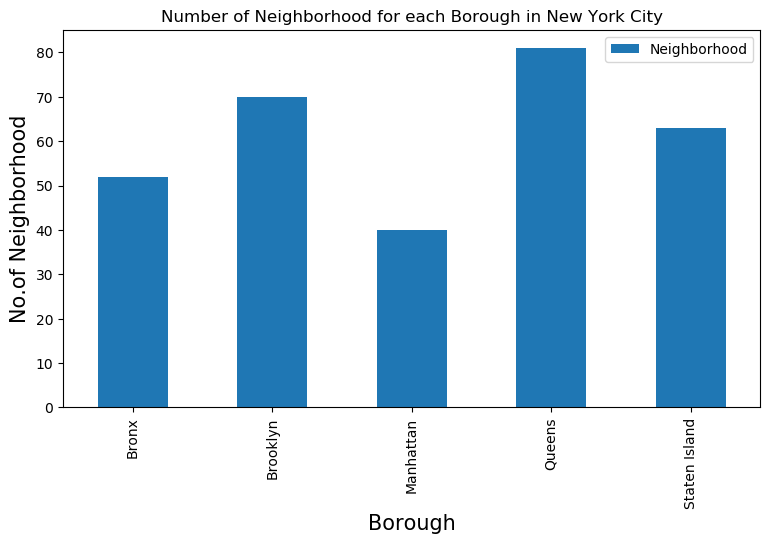

In [29]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()


We see that Queens has highest number of neighborhoods

Now we will collect Indian resturants for each Neighborhood

In [30]:

# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(new_york_data),')','Indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Indian Resturants in Wakefield, Bronx:0
( 2 / 306 ) Indian Resturants in Co-op City, Bronx:0
( 3 / 306 ) Indian Resturants in Eastchester, Bronx:0
( 4 / 306 ) Indian Resturants in Fieldston, Bronx:0
( 5 / 306 ) Indian Resturants in Riverdale, Bronx:1
( 6 / 306 ) Indian Resturants in Kingsbridge, Bronx:1
( 7 / 306 ) Indian Resturants in Marble Hill, Manhattan:0
( 8 / 306 ) Indian Resturants in Woodlawn, Bronx:1
( 9 / 306 ) Indian Resturants in Norwood, Bronx:0
( 10 / 306 ) Indian Resturants in Williamsbridge, Bronx:0
( 11 / 306 ) Indian Resturants in Baychester, Bronx:0
( 12 / 306 ) Indian Resturants in Pelham Parkway, Bronx:0
( 13 / 306 ) Indian Resturants in City Island, Bronx:0
( 14 / 306 ) Indian Resturants in Bedford Park, Bronx:0
( 15 / 306 ) Indian Resturants in University Heights, Bronx:0
( 16 / 306 ) Indian Resturants in Morris Heights, Bronx:0
( 17 / 306 ) Indian Resturants in Fordham, Bronx:0
( 18 / 306 ) Indian Resturants in East Tremont, Bronx:0
( 19 / 306 ) Ind

Now that we have got all the indian resturants in new york city , we will analyze it

In [31]:
indian_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Riverdale,4c04544df423a593ac83d116,Cumin Indian Cuisine
1,Bronx,Kingsbridge,4c04544df423a593ac83d116,Cumin Indian Cuisine
2,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
3,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill
4,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine


In [32]:
indian_rest_ny.shape

(153, 4)

We got 153 Indian Resturants across New York City

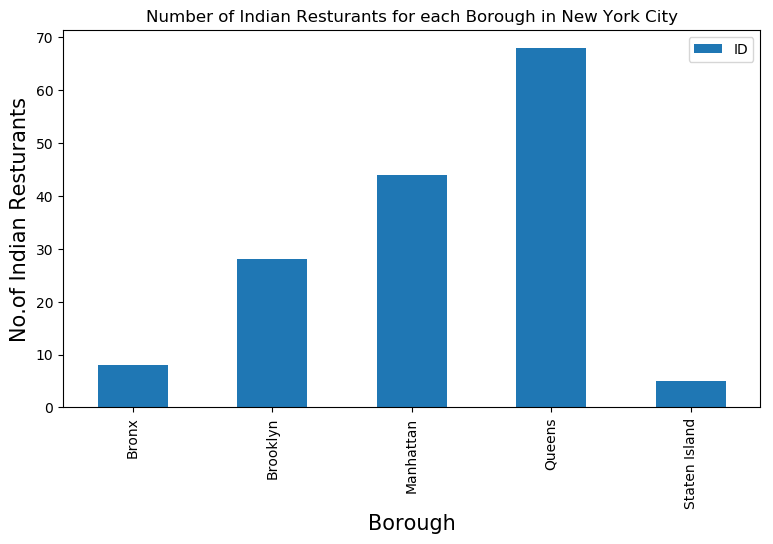

In [33]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

We see that Queens has the largest number of indian resturants

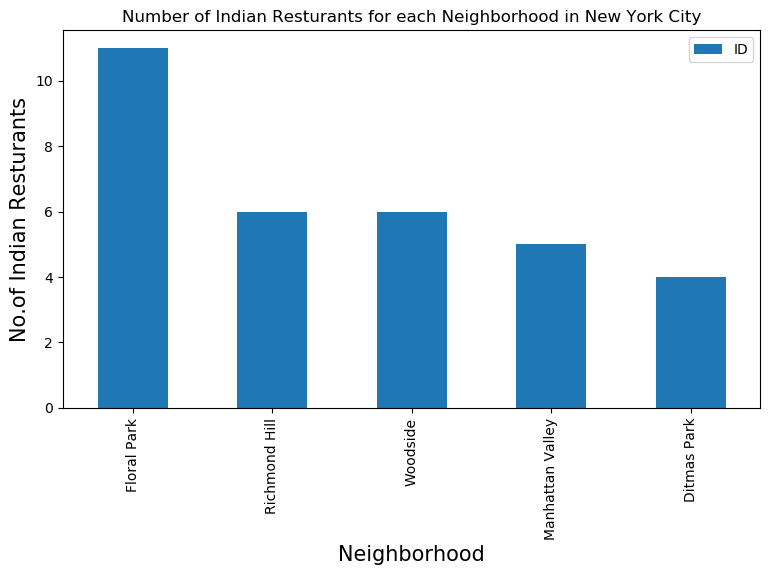

In [34]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [52]:
indian_rest_ny[indian_rest_ny['Neighborhood']=='Floral Park']

,Borough,Neighborhood,ID,Name
104,Queens,Floral Park,527ffc0811d2d329d5e49abd,Jackson Diner
105,Queens,Floral Park,4e4e3e22bd4101d0d7a5c2d1,Kerala Kitchen
106,Queens,Floral Park,4b647b56f964a520c4b62ae3,Usha Foods & Usha Sweets
107,Queens,Floral Park,4b787c49f964a5209cd12ee3,Santoor Indian Restaurant
108,Queens,Floral Park,4c0c01e0bbc676b00d6b4cd5,Mumbai Xpress
109,Queens,Floral Park,4c76ff35a5676dcb72671721,Flavor Of India
110,Queens,Floral Park,571af96a498e9e392d8d3786,Namaste Authenic Indian Cuisine
111,Queens,Floral Park,55d68c1b498ecf05fa196fe1,Namaste Restaurant and Cafe
112,Queens,Floral Park,4ec1b54f4690d2338a359d66,Tabaq Kebab Grill
113,Queens,Floral Park,4df0f39dd4c04d0392c853ea,Sagar Chinese


So Floral Park in Queens has the highest number of Indian Resturants with a total count of 9.     

Now we will get the ranking of each resturant for further analysis.

In [53]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1


                         ID                  Name  Likes  Rating  Tips
0  4c04544df423a593ac83d116  Cumin Indian Cuisine     13     6.4     9
( 1 / 153 ) processed
                         ID                  Name  Likes  Rating  Tips
0  4c04544df423a593ac83d116  Cumin Indian Cuisine     13     6.4     9
( 2 / 153 ) processed
                         ID        Name  Likes  Rating  Tips
0  4c0448d9310fc9b6bf1dc761  Curry Spot      5     7.8    11
( 3 / 153 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     5.9     2
( 4 / 153 ) processed
                         ID                  Name  Likes  Rating  Tips
0  4c04544df423a593ac83d116  Cumin Indian Cuisine     13     6.4     9
( 5 / 153 ) processed
                         ID         Name  Likes  Rating  Tips
0  551b7f75498e86c00a0ed2e1  Hungry Bird      8     6.9     3
( 6 / 153 ) processed
                         ID             

In [54]:
indian_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Riverdale,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,6.4,9
1,Bronx,Kingsbridge,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,6.4,9
2,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,7.8,11
3,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,5.9,2
4,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,6.4,9


In [55]:
indian_rest_stats_ny.shape

(153, 7)

In [56]:
indian_rest_ny.shape

(153, 4)

So we got data for all resturants Now lets save this data to a csv sheet. In case we by mistake modify it. As the number of calls to get details for venue are premium call and have limit of 500 per day, we will refer to saved data sheet csv if required

In [57]:
indian_rest_stats_ny.to_csv('indian_rest_stats_ny.csv', index=False)

Lets verify the data from saved csv file

In [58]:
indian_rest_stats_ny_csv=pd.read_csv('indian_rest_stats_ny.csv')

In [59]:
indian_rest_stats_ny_csv.shape

(153, 7)

In [60]:
indian_rest_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Riverdale,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,6.4,9
1,Bronx,Kingsbridge,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,6.4,9
2,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,7.8,11
3,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,5.9,2
4,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,6.4,9


In [61]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
Borough         153 non-null object
Neighborhood    153 non-null object
ID              153 non-null object
Name            153 non-null object
Likes           153 non-null object
Rating          153 non-null float64
Tips            153 non-null object
dtypes: float64(1), object(6)
memory usage: 8.4+ KB


We see that values like Likes, Tips are strig values. We would need to convert them into float for further analysis

In [62]:
indian_rest_stats_ny['Likes']=indian_rest_stats_ny['Likes'].astype('float64')

In [63]:
indian_rest_stats_ny['Tips']=indian_rest_stats_ny['Tips'].astype('float64')

In [64]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
Borough         153 non-null object
Neighborhood    153 non-null object
ID              153 non-null object
Name            153 non-null object
Likes           153 non-null float64
Rating          153 non-null float64
Tips            153 non-null float64
dtypes: float64(3), object(4)
memory usage: 8.4+ KB


In [65]:
# Resturant with maximum Likes
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                     Midtown
ID              49d91c12f964a520015e1fe3
Name               The Kati Roll Company
Likes                                836
Rating                               8.7
Tips                                 259
Name: 42, dtype: object

In [66]:
# Resturant with maximum Rating
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                587
Rating                               9.1
Tips                                 146
Name: 46, dtype: object

In [67]:
# Resturant with maximum Tips
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                     Midtown
ID              49d91c12f964a520015e1fe3
Name               The Kati Roll Company
Likes                                836
Rating                               8.7
Tips                                 259
Name: 42, dtype: object

Now lets visualize neighborhood with maximum average rating of resturants

In [68]:
ny_neighborhood_stats=indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [69]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
11,Civic Center,9.10
68,Tribeca,9.10
64,Sunnyside,9.10
5,Blissville,9.10
0,Astoria,9.00
29,Greenwich Village,9.00
74,West Village,8.95
23,Fort Greene,8.80
45,Murray Hill,8.70
43,Midtown South,8.70


Above are the top neighborhoods with top average rating of Indian resturants

In [70]:
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [71]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.265909
1,Brooklyn,7.614286
0,Bronx,6.575000
4,Staten Island,6.360000
3,Queens,6.335294


Similarly these are the average rating of Indian Resturants for each Borough     

Lets visualize it

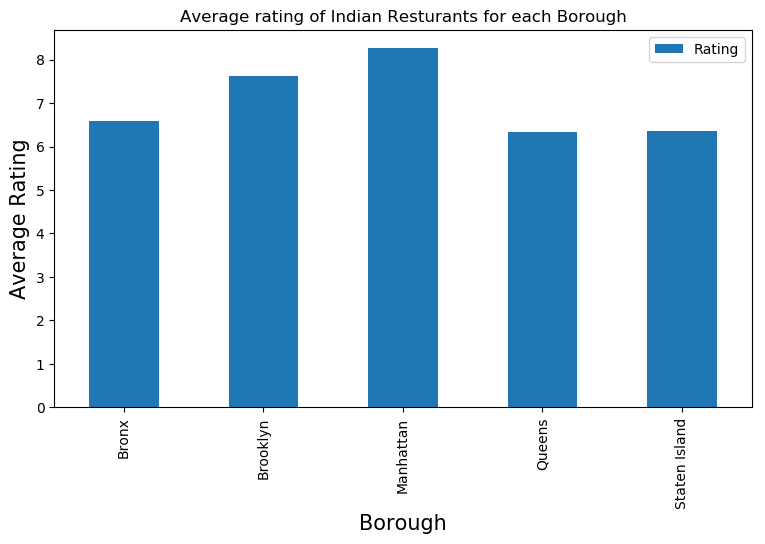

In [72]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Indian Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

We will consider all the neighborhoods with average rating greater or equal 9.0 to visualize on map

In [73]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=9.0]

In [74]:
ny_neighborhood_stats

,Neighborhood,Average Rating
0,Astoria,9.0
5,Blissville,9.1
11,Civic Center,9.1
29,Greenwich Village,9.0
64,Sunnyside,9.1
68,Tribeca,9.1


We will join this dataset to original new york data to get lonitude and latitude

In [75]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')

In [76]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [77]:
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Queens,Astoria,40.768509,-73.915654,9.0
1,Queens,Blissville,40.737251,-73.932442,9.1
2,Manhattan,Civic Center,40.715229,-74.005415,9.1
3,Manhattan,Greenwich Village,40.726933,-73.999914,9.0
4,Queens,Sunnyside,40.740176,-73.926916,9.1
5,Staten Island,Sunnyside,40.612760,-74.097126,9.1
6,Manhattan,Tribeca,40.721522,-74.010683,9.1


Now we will show this data on a map

In [78]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [79]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

Lets add a new field to dataframe for labeling purpose

In [80]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [81]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

Now that we have visualized the Neighborhoods.    


Conclusion   
- Astoria(Queens), Blissville(Queens), Civic Center(Manhattan) are some of the best neighborhoods for indian cuisine       
- Manhattan have potential Indian Resturant Market   
- Staten Island ranks last in average rating of Indian Resturants   
- Manhattan is the best place to stay if you prefer Indian Cuisine     

Limitations  
- The ranking is purely on basis of rating of resturants   
- The accuracy of data depends purely depends on the data provided by FourSquare   